In [1]:
!cp -r "/content/drive/My Drive/facial Recoge Dataset" .

^C


In [1]:
ls

drive/  sample_data/


In [0]:
!cp -r "/content/drive/My Drive/facial Recoge Dataset" .

In [0]:
%tensorflow_version 2.x

In [4]:
from keras.applications import vgg16
from keras.preprocessing.image import img_to_array,ImageDataGenerator
from keras.models import Sequential,Model
from keras.layers import Input,Dense,Conv2D,MaxPooling2D,Flatten
from keras.optimizers import adam

import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [5]:
vgg16=vgg16.VGG16(weights='imagenet')

553467904/553467096 [==============================] - 12s 0us/step


In [6]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [0]:
img_rows, img_cols = 224, 224 
train_dir='/content/facial Recoge Dataset/training_images'
validation_dir='/content/facial Recoge Dataset/test_images'
num_train_img= 256
num_valid_img= 3
epoch= 5

In [0]:
x=vgg16.get_layer('fc2').output

In [9]:
x

<tf.Tensor 'fc2/Relu:0' shape=(None, 4096) dtype=float32>

In [0]:
out1=Dense(3,activation='softmax',name='out_layer')(x)

In [11]:
out1

<tf.Tensor 'out_layer/Softmax:0' shape=(None, 3) dtype=float32>

In [12]:
final_model=Model(input=vgg16.input,outputs=out1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("ou..., inputs=Tensor("in...)`
  """Entry point for launching an IPython kernel.


In [13]:
final_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [14]:
final_model.layers[0].name

'input_1'

In [0]:
for layer in final_model.layers:
    if layer.name not in ['out_layer']:
        layer.trainable=False

In [16]:
for layer in final_model.layers:
    print(layer.trainable)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True


In [17]:
final_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [20]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
training_set = train_datagen.flow_from_directory(
        train_dir,
        target_size=[img_rows,img_cols],
        class_mode='categorical')
test_set = test_datagen.flow_from_directory(
        validation_dir,
        target_size=[img_rows,img_cols],
        class_mode='categorical')

Found 256 images belonging to 3 classes.
Found 0 images belonging to 0 classes.


In [21]:
training_set.class_indices

{'happy': 0, 'sad': 1, 'surprised': 2}

In [0]:
from keras.optimizers import Adam

In [0]:
final_model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

                     
checkpoint = ModelCheckpoint("FaceRegModel.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

# we put our call backs into a callback list
callbacks = [earlystop, checkpoint]

In [25]:
final_model.fit(training_set,epochs=epoch,steps_per_epoch=256)

Epoch 1/5
256/256 [==============================] - 95s 370ms/step - loss: 0.7798 - accuracy: 0.6473
Epoch 2/5
256/256 [==============================] - 91s 355ms/step - loss: 0.5956 - accuracy: 0.7765
Epoch 3/5
256/256 [==============================] - 90s 352ms/step - loss: 0.5026 - accuracy: 0.8311
Epoch 4/5
256/256 [==============================] - 90s 353ms/step - loss: 0.4449 - accuracy: 0.8608
Epoch 5/5
256/256 [==============================] - 91s 355ms/step - loss: 0.4018 - accuracy: 0.8768


In [26]:
ls

 drive/  'facial Recoge Dataset'/   sample_data/


In [27]:
pwd

'/content'

In [29]:
ls /content

 drive/  'facial Recoge Dataset'/   sample_data/


SyntaxError: ignored

In [0]:
final_model.save('myFacialExpressionModel.h5')

In [0]:
from keras.preprocessing import image

In [0]:
test_image = image.load_img('/content/facial Recoge Dataset/test_images/24.jpg', 
               target_size=(224,224))

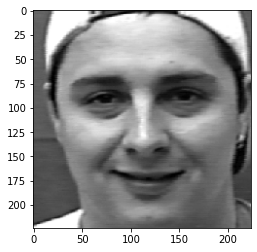

In [55]:
plt.imshow(test_image)

In [56]:
type(test_image)

PIL.Image.Image

In [0]:
test_image = image.img_to_array(test_image)

In [58]:
type(test_image)

numpy.ndarray

In [0]:
test_image = np.expand_dims(test_image, axis=0)

In [60]:
test_image.shape

(1, 224, 224, 3)

In [0]:
def printClass(res):
  if res==0:
    print('Happy')
  elif res==1:
    print('Sad')
  elif res==2:
    print('Surprised')

In [0]:
res = np.argmax(final_model.predict(test_image))

In [65]:
printClass(res)

Happy


In [0]:
def printClass(res):
  if res==0:
    print('Happy')
  elif res==1:
    print('Sad')
  elif res==2:
    print('Surprised')